In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [35]:
def getFeatures(fileName):
    df = pd.read_csv(fileName, index_col='datetime')

    # arm angle calculation using accelerometer data
    df['angle'] = 180 / np.pi * np.arctan(df['wearable-xl1-z'] / np.sqrt(np.square(df['wearable-xl1-x']) + np.square(df['wearable-xl1-z'])))

    # get only interesting columns
    df = df[['angle', 'wearable-mag-xl1']]

    # remove NaN values
    df = df.dropna()
    # convert index to DatetimeIndex
    df.index = pd.DatetimeIndex(df.index)


    # resample data within interval given in resampleInterval ('1S' = 1 second intervals)
    resampleInterval = '1S'
    minimum = df.resample(resampleInterval).min()
    maximum = df.resample(resampleInterval).max()
    mean = df.resample(resampleInterval).mean()
    std = df.resample(resampleInterval).std()
    summ = df.resample(resampleInterval).sum()

    # stack features intu np matrix
    # format: [angMin, magMin, angMax, magMax, angMean, magMean, angStd, magStd, angSum, magSum]
    # features = np.hstack((minimum.as_matrix(), maximum.as_matrix()))


    # rename column labels in DataFrame
    minimum.rename(columns={'angle': 'angle min'}, inplace=True)
    minimum.rename(columns={'wearable-mag-xl1': 'magnitude min'}, inplace=True)
    
    maximum.rename(columns={'angle': 'angle max'}, inplace=True)
    maximum.rename(columns={'wearable-mag-xl1': 'magnitude max'}, inplace=True)
    
    mean.rename(columns={'angle': 'angle mean'}, inplace=True)
    mean.rename(columns={'wearable-mag-xl1': 'magnitude mean'}, inplace=True)
    
    std.rename(columns={'angle': 'angle std'}, inplace=True)
    std.rename(columns={'wearable-mag-xl1': 'magnutude std'}, inplace=True)
    
    summ.rename(columns={'angle': 'angle sum'}, inplace=True)
    summ.rename(columns={'wearable-mag-xl1': 'magnitude sum'}, inplace=True)
    
    # collect DataFrames
    features = [minimum, maximum, mean, std, summ]
    #features = [mean, std]
    features = pd.concat(features, axis=1)
    
    # for some weird reason new nans appear. 
    # need to drop them to have same shape on what to plot
    features = features.dropna()
    std = std.dropna()
    
    return [features, std, df]

In [36]:
# load features from data over a night
[features, std, df] = getFeatures('data_00.csv')
features

,angle min,magnitude min,angle max,magnitude max,angle mean,magnitude mean,angle std,magnutude std,angle sum,magnitude sum
datetime,,,,,,,,,,
2016-05-31 21:59:59,-35.347283,-0.104310,-33.298067,-0.050446,-34.322675,-0.077378,1.449014,0.038088,-68.645350,-0.154757
2016-05-31 22:00:00,-44.242768,-0.242589,44.924437,0.349327,-5.127391,-0.030551,36.793335,0.124841,-102.547814,-0.611011
2016-05-31 22:00:01,42.570323,-0.025688,44.485174,0.593849,43.640686,0.090614,0.525809,0.131104,872.813724,1.812285
2016-05-31 22:00:02,40.186633,-0.144479,44.995244,0.147493,42.970775,-0.007626,1.529568,0.070804,859.415505,-0.152521
2016-05-31 22:00:03,-9.066950,-0.069389,44.998093,0.158202,35.377476,0.048877,18.643726,0.072752,707.549525,0.977546
2016-05-31 22:00:04,-17.089024,-0.464056,44.617398,0.278563,23.729102,0.000082,22.775681,0.151761,474.582046,0.001638
2016-05-31 22:00:05,41.697404,-0.187604,44.797226,0.314450,43.450262,0.066971,0.761600,0.122089,869.005238,1.339415
2016-05-31 22:00:06,44.207303,-0.133277,44.999259,0.149469,44.815167,0.042987,0.278969,0.076358,896.303334,0.859735
2016-05-31 22:00:07,44.817232,-0.024777,44.999732,0.106099,44.957436,0.046950,0.046305,0.029108,899.148719,0.939010


In [37]:
# cluster and label data using K-means into n clusters
label = KMeans(n_clusters=5, random_state=10).fit_predict(features)
# label = SpectralClustering().fit_predict(features)
label

array([3, 3, 4, ..., 0, 0, 0], dtype=int32)

<IPython.core.display.Javascript object>


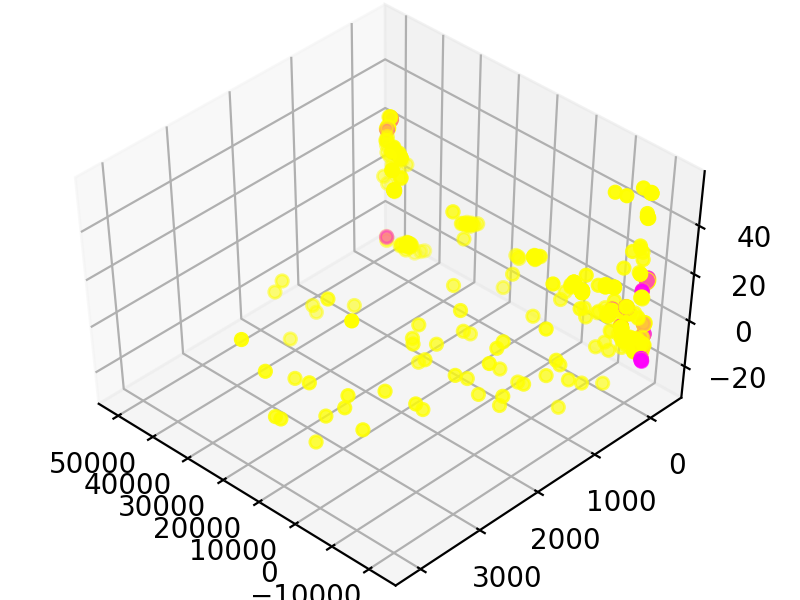

In [34]:
# make PCA (dimensionality reduction) to 3D and plot

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(features)
X = pca.transform(features)

# only needed for non int labels (I think)
# y = np.choose(label, [1, 2, 0]).astype(np.float)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=label2, cmap='spring') # cmap=plt.cm.spectral

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

In [ ]:
# change labels into two classes (merge clusters)

labelReshape = label

labelReshape[labelReshape == 0] = 1
labelReshape[labelReshape == 1] = 0
labelReshape[labelReshape == 2] = 1 #
labelReshape[labelReshape == 3] = 1
labelReshape[labelReshape == 4] = 1

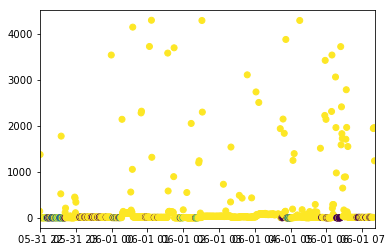

In [31]:
# plot labeled std 
plt.scatter(std.index, std['angle std'], c=label2)
plt.xlim(std.index[0], std.index[-1])
plt.show()